# Análise exploratória dos anúncios de imóveis do site OLX

- Os anúncios correspondem a imóveis a venda ou para alugar do site OLX.
- A base de dados foi extraída do site e possui anúncios de todos os estados.
- Foi extraída apenas uma amostra de anúncios de cada estado, portanto nessa base não há todos os anúncios de imóveis do site.
- **Objetivo:** Fazer uma análise exploratória dos dados contidos nos anúncios de imóveis do site OLX e uma limpeza desses dados.
- **Observação:** A parte da limpeza dos dados se encontra, também, no código do arquivo data_cleaning.py. O data_cleaning.py é usado na DAG para limpar os dados extraídos.

#### Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#### Carregando a base de dados extraída 

In [2]:
FILE_PATH = Path('../data_extraction/imoveisolx/output/dados.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
0,Casas,Venda - casa em rua pública,3,1,2,NaN,NaN,69911349,Rio Branco,AC,Conjunto Bela Vista,194.000,https://ac.olx.com.br/acre/imoveis/casa-a-vend...
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120.000,https://ac.olx.com.br/acre/imoveis/casa-mista-...
2,Casas,Venda - casa em rua pública,2,2,3,NaN,NaN,69900000,Rio Branco,AC,NaN,NaN,https://ac.olx.com.br/acre/imoveis/vendo-casa-...
3,Casas,Venda - casa em rua pública,0,0,0,NaN,NaN,69930000,Xapuri,AC,NaN,45.000,https://ac.olx.com.br/acre/imoveis/casa-reside...
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,NaN,69919760,Rio Branco,AC,Conjunto Tucumã,270.000,https://ac.olx.com.br/acre/imoveis/vende-se-ca...


#### Verificando o número de linhas e o número de colunas do dataframe 

In [3]:
sh = df.shape
print(f"Número de linhas é {sh[0]} e número de colunas é {sh[1]}")

Número de linhas é 210473 e número de colunas é 13


#### Obtendo as informações do dataframe 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210473 entries, 0 to 210472
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   categoria            210473 non-null  object
 1   tipo                 206137 non-null  object
 2   quartos              205545 non-null  object
 3   banheiros            200545 non-null  object
 4   vagas_garagem        189339 non-null  object
 5   detalhes_imovel      130543 non-null  object
 6   detalhes_condominio  103831 non-null  object
 7   cep                  210473 non-null  int64 
 8   cidade               210470 non-null  object
 9   estado               210473 non-null  object
 10  bairro               184489 non-null  object
 11  preco                203845 non-null  object
 12  url                  210473 non-null  object
dtypes: int64(1), object(12)
memory usage: 20.9+ MB


Observe que a única coluna numérica do dataframe é a coluna de cep. Portanto, dado o objetivo aqui, preciso transformar em numérica algumas colunas do dataframe, tal como: quartos, banheiros, vagas_garagem, preço.

Antes de fazer a transformação das colunas, vou verificar os valores únicos de cada uma.

#### Verificando os valores únicos das colunas 'quartos', 'banheiros' e 'vagas_garagem' 

Valores únicos da coluna quartos

In [5]:
df.quartos.unique()

array(['3', '2', '0', '4', '1', '5 ou mais', nan], dtype=object)

Valores únicos da coluna banheiros

In [6]:
df.banheiros.unique()

array(['1', '2', '0', '3', '5 ou mais', '4', nan], dtype=object)

Valores únicos da coluna vagas_garagem

In [7]:
df.vagas_garagem.unique()

array(['2', '3', '0', nan, '1', '4', '5 ou mais', '8', '6', '10'],
      dtype=object)

#### Substituindo valores NaN das colunas 'quartos', 'banheiros' e 'vagas_garagem'

Escolhi a abordagem de fazer a substituição dos valores NaN dessas colunas ao invés da remoção das linhas que continham essas valores nessas colunas. Notei que já exitiam valores 0 nas colunas 'banheiros' e 'vagas_garagem' e optei por substituir os valores ausentes por 0. 

In [8]:
df[['quartos', 'banheiros', 'vagas_garagem']] = df[['quartos', 'banheiros', 'vagas_garagem']].fillna('0') 

#### Transformando as colunas 'quartos', 'banheiros' e 'vagas_garagem' em numéricas 

Note que há valores '5 ou mais' nas três colunas. Dado que, mesmo tendo valores maiores que 5 na coluna de garagem, ainda tem essa categoria de 5 ou mais. Para transformar as colunas em numéricas, substituirei o ' ou mais' por '' e considerarei apenas o número.

In [9]:
df.quartos = df.quartos.str.replace(' ou mais', '')

In [10]:
df.quartos.unique()

array(['3', '2', '0', '4', '1', '5'], dtype=object)

In [11]:
df.banheiros = df.banheiros.str.replace(' ou mais', '')

In [12]:
df.banheiros.unique()

array(['1', '2', '0', '3', '5', '4'], dtype=object)

In [13]:
df.vagas_garagem = df.vagas_garagem.str.replace(' ou mais', '')

In [14]:
df.vagas_garagem.unique()

array(['2', '3', '0', '1', '4', '5', '8', '6', '10'], dtype=object)

Transformando as três colunas em numéricas

In [15]:
df.quartos = df.quartos.astype('int')

In [16]:
df.banheiros = df.banheiros.astype('int')

In [17]:
df.vagas_garagem = df.vagas_garagem.astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210473 entries, 0 to 210472
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   categoria            210473 non-null  object
 1   tipo                 206137 non-null  object
 2   quartos              210473 non-null  int32 
 3   banheiros            210473 non-null  int32 
 4   vagas_garagem        210473 non-null  int32 
 5   detalhes_imovel      130543 non-null  object
 6   detalhes_condominio  103831 non-null  object
 7   cep                  210473 non-null  int64 
 8   cidade               210470 non-null  object
 9   estado               210473 non-null  object
 10  bairro               184489 non-null  object
 11  preco                203845 non-null  object
 12  url                  210473 non-null  object
dtypes: int32(3), int64(1), object(9)
memory usage: 18.5+ MB


#### Removendo os registros que possuem preço vazio

Diferentemente da abordagem escolhida para os campos quartos, banheiros e vagas_garagem, escolhi a abordagem de remover o registro quando o preço é nulo. Aqui, não faz muito sentido considerarmos anúncios de venda ou aluguel que possuem preço nulo.

In [19]:
print(f"Quantidade de anúncios que possuem preço nulo: {df[df.preco.isna()].shape[0]}")

Quantidade de anúncios que possuem preço nulo: 6628


Então, removendo esses 6628 anúncios da base:

In [20]:
df = df.dropna(subset=['preco'])
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
0,Casas,Venda - casa em rua pública,3,1,2,NaN,NaN,69911349,Rio Branco,AC,Conjunto Bela Vista,194.000,https://ac.olx.com.br/acre/imoveis/casa-a-vend...
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120.000,https://ac.olx.com.br/acre/imoveis/casa-mista-...
3,Casas,Venda - casa em rua pública,0,0,0,NaN,NaN,69930000,Xapuri,AC,NaN,45.000,https://ac.olx.com.br/acre/imoveis/casa-reside...
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,NaN,69919760,Rio Branco,AC,Conjunto Tucumã,270.000,https://ac.olx.com.br/acre/imoveis/vende-se-ca...
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,NaN,350.864,https://ac.olx.com.br/acre/imoveis/parkia-boul...


#### Convertendo preço de string para float 

In [21]:
df['preco'] = df['preco'].str.replace('.','').astype('float')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203845 entries, 0 to 210472
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   categoria            203845 non-null  object 
 1   tipo                 200217 non-null  object 
 2   quartos              203845 non-null  int32  
 3   banheiros            203845 non-null  int32  
 4   vagas_garagem        203845 non-null  int32  
 5   detalhes_imovel      127147 non-null  object 
 6   detalhes_condominio  101010 non-null  object 
 7   cep                  203845 non-null  int64  
 8   cidade               203842 non-null  object 
 9   estado               203845 non-null  object 
 10  bairro               179807 non-null  object 
 11  preco                203845 non-null  float64
 12  url                  203845 non-null  object 
dtypes: float64(1), int32(3), int64(1), object(8)
memory usage: 19.4+ MB


#### Fazendo um describe() do dataframe

Lembrando que apenas colunas numéricas aparecem no describe()

In [23]:
df.describe()

,quartos,banheiros,vagas_garagem,cep,preco
count,203845.000000,203845.000000,203845.000000,2.038450e+05,2.038450e+05
mean,2.467949,1.996478,1.481719,6.061587e+07,3.864945e+05
std,1.065969,1.329981,1.255914,2.092842e+07,1.250100e+06
min,0.000000,0.000000,0.000000,1.020000e+06,0.000000e+00
25%,2.000000,1.000000,1.000000,4.916000e+07,1.250000e+03
50%,2.000000,2.000000,1.000000,6.500000e+07,1.250000e+05
75%,3.000000,3.000000,2.000000,7.680131e+07,4.500000e+05
max,5.000000,5.000000,10.000000,9.971313e+07,1.500000e+08


A partir desse describe(), conseguimos notar que:
- Em média, o número de quartos da amostra extraída dos imóveis anunciados na OLX é 2.
- Em média, o número de banheiros da amostra extraída dos imóveis anunciados na OLX é de 2.
- Em média, o número de vagas na garagem da amostra extraída dos imóveis anunciados na OLX é de 1.

Além disso, podemos observar que o preço mínimo é 0. O que, segundo a abordagem aqui escolhida, não faz sentido. Portanto, assim como foi feita a exclusão dos registros com preço nulo, as linhas com preço 0 também serão removidas.

#### Removendo as linhas com preço 0 

In [24]:
print(f"Quantidade de anúncios que o preço é 0: {df.query('preco == 0.0').shape[0]}")

Quantidade de anúncios que o preço é 0: 5032


In [25]:
df = df.drop(df.query("preco == 0.0").index)
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
0,Casas,Venda - casa em rua pública,3,1,2,NaN,NaN,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...
3,Casas,Venda - casa em rua pública,0,0,0,NaN,NaN,69930000,Xapuri,AC,NaN,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,NaN,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,NaN,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...


In [26]:
df.shape

(198813, 13)

#### Verificando se há valores nulos nas outras colunas e decidindo a abordagem 

In [27]:
df.isnull().sum()

categoria                   0
tipo                     3504
quartos                     0
banheiros                   0
vagas_garagem               0
detalhes_imovel         74054
detalhes_condominio    100295
cep                         0
cidade                      3
estado                      0
bairro                  22070
preco                       0
url                         0
dtype: int64

Observe que as únicas colunas que possuem valor nulo são: tipo, detalhes_imovel, detalhes_condominio, bairro, cidade.

Como a quantidade de anúncios que não possui cidade informada é pequena (apenas 3), irei removê-los da base.
Em contrapartida, como os outros campos têm muitos valores nulos, irei fazer uma substituição desses valores para "Não informado", o que faz sentido com os campos.

#### Removendo os registros que possuem cidade nula 

In [28]:
df = df.dropna(subset=['cidade'])

In [29]:
df.shape

(198810, 13)

#### Substituindo os valores nulos das colunas tipo, detalhes_imovel, detalhes_condominio e bairro para "Não informado" 

In [30]:
df.tipo = df.tipo.fillna('Não informado')
df.detalhes_imovel = df.detalhes_imovel.fillna('Não informado')
df.detalhes_condominio = df.detalhes_condominio.fillna('Não informado')
df.bairro = df.bairro.fillna('Não informado')

In [31]:
df.shape

(198810, 13)

In [32]:
df.isnull().sum()

categoria              0
tipo                   0
quartos                0
banheiros              0
vagas_garagem          0
detalhes_imovel        0
detalhes_condominio    0
cep                    0
cidade                 0
estado                 0
bairro                 0
preco                  0
url                    0
dtype: int64

In [33]:
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...
3,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...


#### Visualizando os valores únicos da coluna categoria

In [34]:
df.categoria.value_counts()

Apartamentos                      122562
Casas                              72744
Aluguel de quartos                  3502
Temporada                              1
Aluguel - casas e apartamentos         1
Name: categoria, dtype: int64

Visualizando as informações dos anúncios que possuem categoria igual a Temporada e igual a Aluguel - casas e apartamentos. Note, que só tem 1 anúncio de cada categoria dessas.

In [35]:
df.query("categoria == 'Temporada'")

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
189695,Temporada,Não informado,2,0,1,Não informado,Não informado,88220000,Itapema,SC,Não informado,350.0,https://sc.olx.com.br/norte-de-santa-catarina/...


In [36]:
df.query("categoria == 'Aluguel - casas e apartamentos'")

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
72050,Aluguel - casas e apartamentos,Não informado,0,0,0,Não informado,Não informado,65060641,São Luís,MA,Angelim,400.0,https://ma.olx.com.br/regiao-de-sao-luis/imove...


Como só temos um anúncio de cada e não temos o tipo de imóvel/anúncio desses casos para nos auxiliar a renomear o campo de categoria para um que fizesse sentido e que tem mais registros, optei por remover essas linhas.

In [37]:
df = df[~df.categoria.isin(['Aluguel - casas e apartamentos', 'Temporada'])]
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url
0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...
3,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...


In [38]:
df.categoria.value_counts()

Apartamentos          122562
Casas                  72744
Aluguel de quartos      3502
Name: categoria, dtype: int64

#### Criando uma coluna que indica se o imóvel é pra alugar ou pra vender (de forma mais direta) 

Na coluna tipo, temos a indicação de ser um imóvel para venda ou para aluguel. Dessa forma, criarei uma outra coluna que mostre de forma mais direta isso usando essa coluna. Porém, alguns anúncios ficarão com o valor 'Não informado' nessa nova coluna, caso o tipo também tenha esse valor.

In [39]:
df.tipo.value_counts()

Venda - apartamento padrão              60839
Aluguel - apartamento padrão            54091
Venda - casa em rua pública             37185
Aluguel - casa em rua pública           18464
Venda - casa em condominio fechado      11392
Aluguel - apartamento kitchenette        4400
Aluguel - casa em condominio fechado     3523
Não informado                            3502
Aluguel - casa em vila                   1452
Venda - apartamento cobertura             853
Aluguel - loft/studio                     755
Venda - casa em vila                      717
Aluguel - apartamento cobertura           484
Venda - loft/studio                       338
Venda - apartamento duplex/triplex        297
Aluguel - apartamento duplex/triplex      276
Venda - apartamento kitchenette           229
Venda - casa                                7
Aluguel - casa                              4
Name: tipo, dtype: int64

In [40]:
df_tipo_nao_informado = df[df.tipo.isin(['Não informado'])]
df_tipo_nao_informado.tipo.value_counts()

Não informado    3502
Name: tipo, dtype: int64

In [41]:
df_tipo_informado = df[~df.tipo.isin(['Não informado'])]
df_tipo_informado.tipo.value_counts()

Venda - apartamento padrão              60839
Aluguel - apartamento padrão            54091
Venda - casa em rua pública             37185
Aluguel - casa em rua pública           18464
Venda - casa em condominio fechado      11392
Aluguel - apartamento kitchenette        4400
Aluguel - casa em condominio fechado     3523
Aluguel - casa em vila                   1452
Venda - apartamento cobertura             853
Aluguel - loft/studio                     755
Venda - casa em vila                      717
Aluguel - apartamento cobertura           484
Venda - loft/studio                       338
Venda - apartamento duplex/triplex        297
Aluguel - apartamento duplex/triplex      276
Venda - apartamento kitchenette           229
Venda - casa                                7
Aluguel - casa                              4
Name: tipo, dtype: int64

In [42]:
df_tipo_informado['operacao'] = df_tipo_informado.tipo.str.split('-').str[0]
df_tipo_informado['operacao'].value_counts()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Venda       111857
Aluguel      83449
Name: operacao, dtype: int64

In [43]:
df_tipo_informado.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda
3,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda


In [44]:
df_tipo_nao_informado['operacao'] = 'Não informado'
df_tipo_nao_informado.head()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
58,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69900000,Rio Branco,AC,Não informado,200.0,https://ac.olx.com.br/acre/imoveis/aluga-se-ap...,Não informado
68,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69918760,Rio Branco,AC,Conquista,600.0,https://ac.olx.com.br/acre/imoveis/apartamento...,Não informado
71,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69980000,Cruzeiro do Sul,AC,Não informado,600.0,https://ac.olx.com.br/acre/imoveis/alugo-apart...,Não informado
119,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69919182,Rio Branco,AC,Residencial Petrópolis,750.0,https://ac.olx.com.br/acre/imoveis/alugo-uma-k...,Não informado
126,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69918412,Rio Branco,AC,Conjunto Manoel Julião,400.0,https://ac.olx.com.br/acre/imoveis/aluga-se-ap...,Não informado


In [45]:
novo_df = pd.concat([df_tipo_informado, df_tipo_nao_informado])
novo_df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda
3,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda
4,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda


#### Verificando a distribuição dos preços da base 

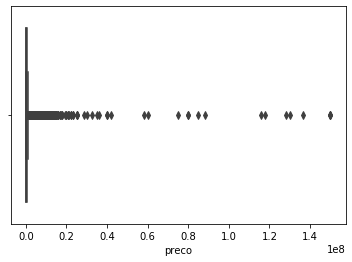

In [46]:
sns.boxplot(x=novo_df['preco'])

In [52]:
value_counts_preco = novo_df['preco'].value_counts()
value_counts_preco

1000.0       3327
700.0        3253
1200.0       3123
600.0        2989
800.0        2897
             ... 
850004.0        1
1878975.0       1
469733.0        1
469722.0        1
5185356.0       1
Name: preco, Length: 16693, dtype: int64

In [54]:
novo_df[novo_df.preco.isin(value_counts_preco[value_counts_preco == 1].index)]

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
5,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda
7,Casas,Venda - casa em condominio fechado,4,3,3,"Área de serviço, Armários na cozinha, Armários...","Condomínio fechado, Segurança 24h, Área murada...",69915324,Rio Branco,AC,Distrito Ind,416999.0,https://ac.olx.com.br/acre/imoveis/linda-casa-...,Venda
1088,Casas,Venda - casa em rua pública,2,1,1,Área de serviço,Não informado,69908746,Rio Branco,AC,Loteamento Santa Helena,98800.0,https://ac.olx.com.br/acre/imoveis/casa-no-lot...,Venda
1256,Casas,Venda - casa em rua pública,2,1,1,Varanda,Não informado,69940000,Sena Madureira,AC,Não informado,16300.0,https://ac.olx.com.br/acre/imoveis/oportunidad...,Venda
1313,Casas,Venda - casa em rua pública,2,1,1,"Área de serviço, Churrasqueira, Varanda",Não informado,69905800,Rio Branco,AC,Areal,74000.0,https://ac.olx.com.br/acre/imoveis/vende-se-95...,Venda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168869,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69314112,Boa Vista,RR,Santa Tereza,237.0,https://rr.olx.com.br/roraima/imoveis/preciso-...,Não informado
170381,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,69316578,Boa Vista,RR,Senador Hélio Campos,97.0,https://rr.olx.com.br/roraima/imoveis/curso-de...,Não informado
191858,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,49100000,São Cristóvão,SE,Não informado,51975.0,https://se.olx.com.br/sergipe/imoveis/a-unica-...,Não informado
196790,Aluguel de quartos,Não informado,0,0,0,Não informado,Não informado,49027190,Aracaju,SE,Grageru,267.0,https://se.olx.com.br/sergipe/imoveis/quarto-p...,Não informado


In [56]:
novo_df['preco'].mean()

396286.72184217937

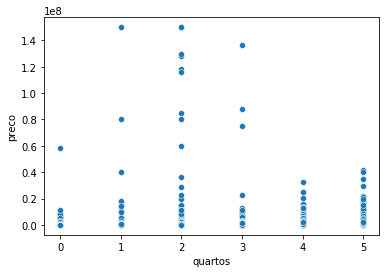

In [58]:
sns.scatterplot(data=novo_df, x = 'quartos', y = 'preco')

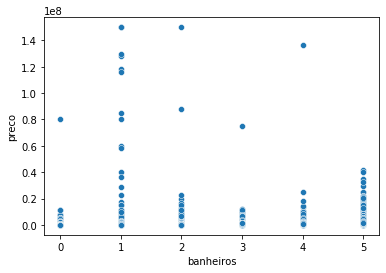

In [59]:
sns.scatterplot(data=novo_df, x = 'banheiros', y = 'preco')

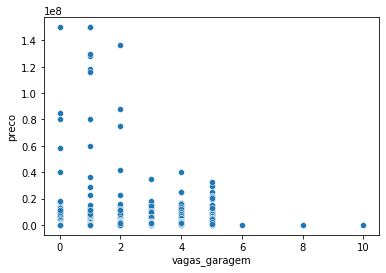

In [60]:
sns.scatterplot(data=novo_df, x = 'vagas_garagem', y = 'preco')

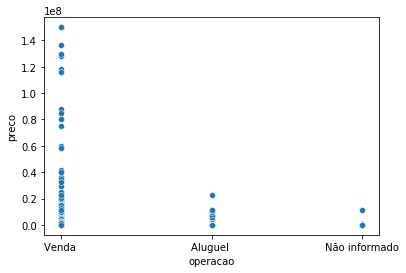

In [61]:
sns.scatterplot(data=novo_df, x = 'operacao', y = 'preco')

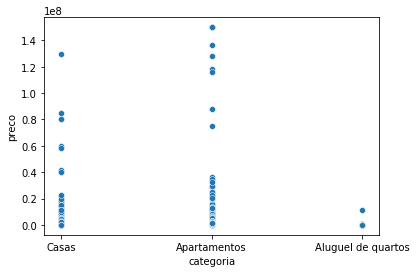

In [62]:
sns.scatterplot(data=novo_df, x = 'categoria', y = 'preco')

#### Salvando uma base com os dados limpos 

In [178]:
FILE_OUT = Path('../data_extraction/imoveisolx/output/dados_limpos.csv')
novo_df.to_csv(FILE_OUT, index=False, encoding='utf-8')

#### Obtendo o número de anúncios para cada número de quartos 

In [ ]:
df.quartos.value_counts()

In [ ]:
sns.catplot(x="quartos", kind="count", palette="Set2", data=df)

#### Obtendo o número de anúncios para cada número de banheiros 

In [ ]:
df.banheiros.value_counts()

In [ ]:
sns.catplot(x="banheiros", kind="count", palette="Set2", data=df)

#### Obtendo o número de anúncios para cada número de vagas na garagem 

In [ ]:
df.vagas_garagem.value_counts()

In [ ]:
sns.catplot(x="vagas_garagem", kind="count", palette="Set2", data=df)

In [ ]:
df.tipo.value_counts()

In [ ]:
df.query("categoria == 'Aluguel - casas e apartamentos'")

In [2]:
FILE_PATH = Path('../data_extraction/imoveisolx/output/dados_limpos_antigo.csv')
df = pd.read_csv(FILE_PATH)
df.head()

,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda
1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda
2,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda
3,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda
4,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda


In [3]:
df = df.reset_index()

In [5]:
df.head()

,index,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
0,0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda
1,1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda
2,2,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda
3,3,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda
4,4,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda


In [6]:
df = df.rename(columns={'index': 'id'})
df.head()

,id,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao
0,0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda
1,1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda
2,2,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda
3,3,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda
4,4,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda


In [7]:
df['created_at'] = '2021-12-23 12:00:00'

In [8]:
df.head()

,id,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,operacao,created_at
0,0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,Venda,2021-12-23 12:00:00
1,1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,Venda,2021-12-23 12:00:00
2,2,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,Venda,2021-12-23 12:00:00
3,3,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,Venda,2021-12-23 12:00:00
4,4,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,Venda,2021-12-23 12:00:00


In [10]:
df = df[['id','categoria','tipo','quartos','banheiros','vagas_garagem','detalhes_imovel','detalhes_condominio','cep','cidade','estado','bairro','preco','url','created_at', 'operacao']]
df.head()

,id,categoria,tipo,quartos,banheiros,vagas_garagem,detalhes_imovel,detalhes_condominio,cep,cidade,estado,bairro,preco,url,created_at,operacao
0,0,Casas,Venda - casa em rua pública,3,1,2,Não informado,Não informado,69911349,Rio Branco,AC,Conjunto Bela Vista,194000.0,https://ac.olx.com.br/acre/imoveis/casa-a-vend...,2021-12-23 12:00:00,Venda
1,1,Casas,Venda - casa em rua pública,3,1,2,"Área de serviço, Armários na cozinha, Armários...","Área murada, Portão eletrônico",69919628,Rio Branco,AC,Jardim Primavera,120000.0,https://ac.olx.com.br/acre/imoveis/casa-mista-...,2021-12-23 12:00:00,Venda
2,2,Casas,Venda - casa em rua pública,0,0,0,Não informado,Não informado,69930000,Xapuri,AC,Não informado,45000.0,https://ac.olx.com.br/acre/imoveis/casa-reside...,2021-12-23 12:00:00,Venda
3,3,Casas,Venda - casa em rua pública,3,2,3,Varanda,Não informado,69919760,Rio Branco,AC,Conjunto Tucumã,270000.0,https://ac.olx.com.br/acre/imoveis/vende-se-ca...,2021-12-23 12:00:00,Venda
4,4,Apartamentos,Venda - apartamento padrão,3,2,2,"Área de serviço, Churrasqueira, Varanda","Condomínio fechado, Elevador, Segurança 24h, P...",69900000,Rio Branco,AC,Não informado,350864.0,https://ac.olx.com.br/acre/imoveis/parkia-boul...,2021-12-23 12:00:00,Venda


In [12]:
df.shape

(198808, 16)

In [11]:
FILE_OUT = Path('../data_extraction/imoveisolx/output/dados_limpos.csv')
df.to_csv(FILE_OUT, index=False, encoding='utf-8')